## Example of k-means clustering



---



---
(You've seen most of the code before)

---



---



Lecturer: Dimitar Kazakov

* The scikit manual on `PCA` says:
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The **input data is centered but not scaled** for each feature before applying the SVD."

* `sklearn.preprocessing.normalize`: **Scale** input vectors individually **to unit norm** (vector length).

* `sklearn.preprocessing.scale`: **Center to the mean** and component wise **scale to unit variance**.

From: https://stats.stackexchange.com/questions/385775/normalizing-vs-scaling-before-pca

Author: https://stats.stackexchange.com/users/82893/john-madden

Scaling is important because SVD approximates in the sum of squares sense, so if one variable is on a different scale than another, it will dominate the PCA procedure, and the low D plot will really just be visualizing that dimension.

I will illustrate with an example in python.

Let's first set up an environment:


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
import matplotlib.pyplot as plt
#turn on interactive mode
plt.ion()

# For reproducibility
np.random.seed(123)

We're going to generate data that are standard normal/uncorrelated in 4 dimensions, but with one additional variable that takes value either 0 or 3 randomly, giving a 5 dimensional dataset that we wish to visualize:

In [2]:
N = 200
P = 5

X = np.random.normal(size=[N,P])
X = np.append(X, 3*np.random.choice(2, size = [N,1]), axis = 1)

We will first do PCA without any preprocessing:



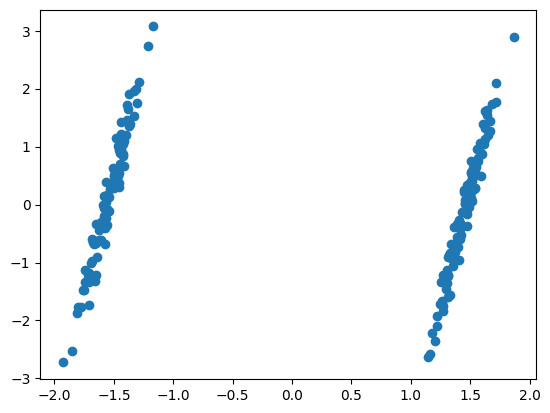

In [3]:
# No preprocessing:
pca = PCA(2)
low_d = pca.fit_transform(X)
plt.scatter(low_d[:,0], low_d[:,1])

We clearly see two clusters, but the data were generated completely at random with no structure at all!

Normalizing changes the plot, but we still see 2 clusters:

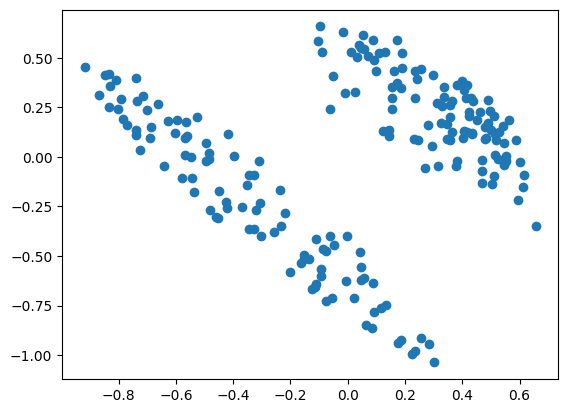

In [4]:
# normalize
Xn = normalize(X)
pca = PCA(2)
low_d = pca.fit_transform(Xn)
plt.scatter(low_d[:,0], low_d[:,1])

Here the k-means algorithm is used with k=2 to separate the data into two clusters.

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
#import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(low_d)

In [6]:
data = {
    "PC1": low_d[:,0],
    "PC2": low_d[:,1],
    "label":  kmeans.labels_
}

df = pd.DataFrame(data)

mask0 = df["label"].isin([0])
mask1 = df["label"].isin([1])

label0data = df[mask0]
label1data = df[mask1]
label1data.shape

(61, 3)

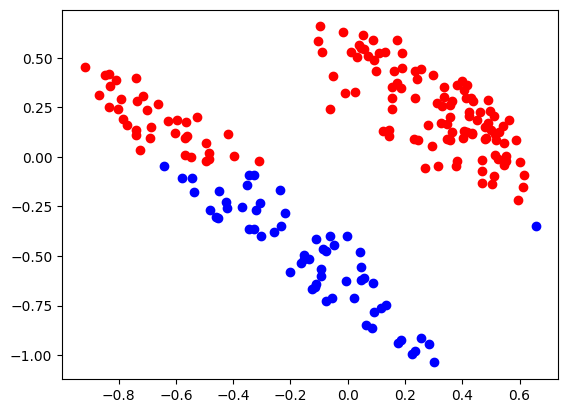

In [7]:
#plotting the results
plt.scatter(label0data["PC1"], label0data["PC2"], color = 'red')
plt.scatter(label1data["PC1"], label1data["PC2"], color = 'blue')
plt.show()

In [8]:
kmeans.cluster_centers_

array([[ 0.0552476 ,  0.21932481],
       [-0.12589206, -0.49977292]])